In [2]:
import xarray as xr
import rioxarray
from pathlib import Path
import matplotlib.pyplot as plt

In [59]:
# target
data_dir = Path("/scratch/sdupuis/DATA/DADA-SR/target_2")

# Get all .tif files in the folder (sorted by name)
tif_files = sorted(data_dir.glob("*.tif"))

# Open each file with xarray and store in a list
target = [xr.open_dataset(f, engine="rasterio").sel(y=slice(None, None, -1)) for f in tif_files]

print(f"Loaded {len(target)} datasets.")


Loaded 8 datasets.


In [62]:
# source
data_dir = Path("/scratch/sdupuis/DATA/DADA-SR/output_2")

# Get all .tif files in the folder (sorted by name)
tif_files = sorted(data_dir.glob("*source*.tif"))

# Open each file with xarray and store in a list
source = [xr.open_dataset(f, engine="rasterio").sel(y=slice(None, None, -1)) for f in tif_files]

print(f"Loaded {len(source)} datasets.")

Loaded 8 datasets.


In [61]:
# quit butterly 
data_dir = Path("/scratch/sdupuis/DATA/DADA-SR/output_2")

# Get all .tif files in the folder (sorted by name)
#10_image_fiery-waterfall_europe.tif
tif_files = sorted(data_dir.glob("*_fiery*.tif"))
print(tif_files)

# Open each file with xarray and store in a list
fiery_waterfall = [xr.open_dataset(f, engine="rasterio").sel(y=slice(None, None, -1)) for f in tif_files]

print(f"Loaded {len(fiery_waterfall)} datasets.")

[PosixPath('/scratch/sdupuis/DATA/DADA-SR/output_2/01_canada_group_2_fiery-waterfall_v11.0_round2.tif'), PosixPath('/scratch/sdupuis/DATA/DADA-SR/output_2/02_alaska_group_3_fiery-waterfall_v11.0_round2.tif'), PosixPath('/scratch/sdupuis/DATA/DADA-SR/output_2/03_mexico_group_1_fiery-waterfall_v11.0_round2.tif'), PosixPath('/scratch/sdupuis/DATA/DADA-SR/output_2/04_greenland_group_4_fiery-waterfall_v11.0_round2.tif'), PosixPath('/scratch/sdupuis/DATA/DADA-SR/output_2/05_siberia_lon50_group_7_fiery-waterfall_v11.0_round2.tif'), PosixPath('/scratch/sdupuis/DATA/DADA-SR/output_2/06_siberia_high_lat_group_8_fiery-waterfall_v11.0_round2.tif'), PosixPath('/scratch/sdupuis/DATA/DADA-SR/output_2/07_sib_lon100_group_5_fiery-waterfall_v11.0_round2.tif'), PosixPath('/scratch/sdupuis/DATA/DADA-SR/output_2/10_europe_group_6_fiery-waterfall_v11.0_round2.tif')]
Loaded 8 datasets.


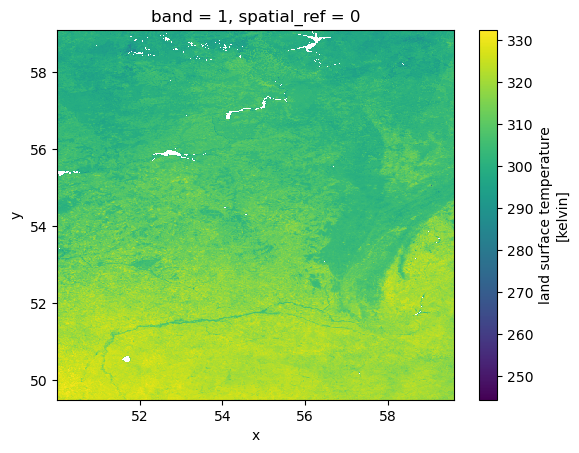

In [82]:
target[4]['band_data'].plot()

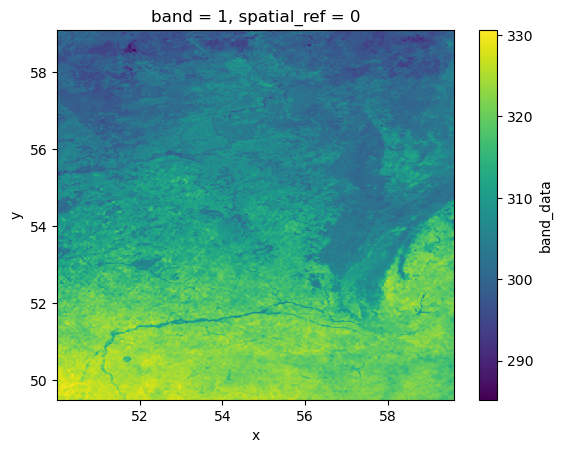

In [83]:
fiery_waterfall[4]['band_data'].plot()

In [1]:
target[0]['band_data']

NameError: name 'target' is not defined

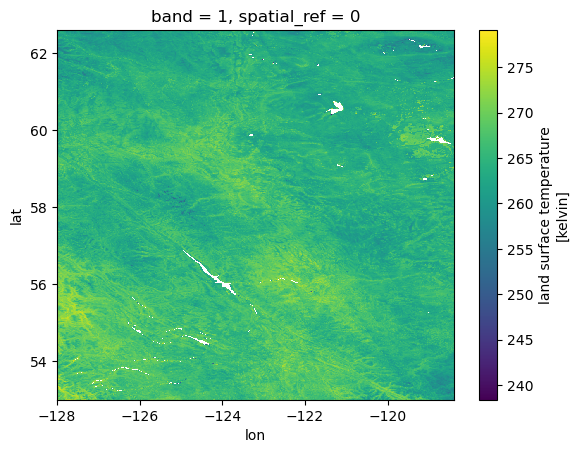

In [66]:
datasets[0]['band_data'].plot()

In [67]:
# Force same coordinate names if they differ
datasets = [ds.rename({"x": "lon", "y": "lat"}) if "x" in ds.dims else ds
            for ds in target]
evaluation = [ds.rename({"x": "lon", "y": "lat"}) if "x" in ds.dims else ds
              for ds in fiery_waterfall]

# Reverse latitude if needed
datasets = [ds.sel(lat=slice(None, None, -1)) if ds.lat[0] > ds.lat[-1] else ds for ds in datasets]

differences = []
for dsA, dsB in zip(datasets, evaluation):
    # Ensure consistent lat ordering
    if dsA.lat[0] > dsA.lat[-1]:
        dsA = dsA.sel(lat=slice(None, None, -1))
    if dsB.lat[0] > dsB.lat[-1]:
        dsB = dsB.sel(lat=slice(None, None, -1))

    # Interpolate dsB onto dsA's lat/lon grid
    dsB_interp = dsB.interp(lat=dsA.lat, lon=dsA.lon)
    
    differences.append(dsA - dsB_interp)

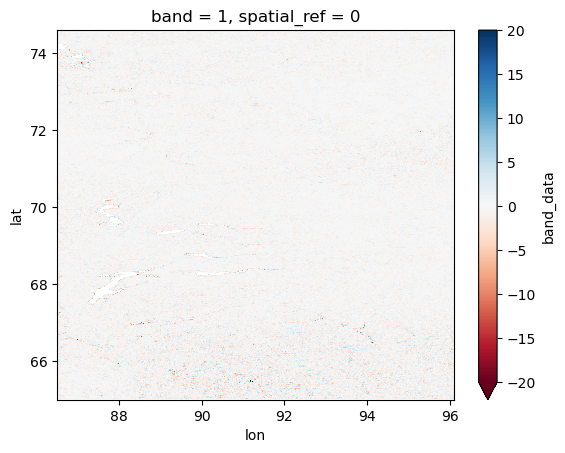

In [68]:
differences[5]['band_data'].plot(vmin=-20, vmax=20,cmap="RdBu")

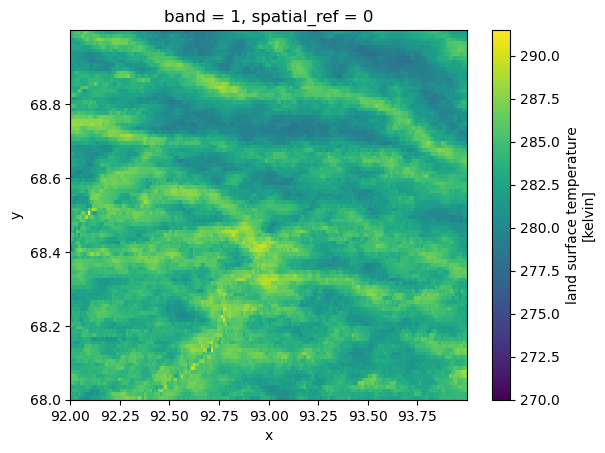

In [69]:
target[5]['band_data'].sel(y=slice(69,68), x=slice(92,94)).plot(vmin=270)

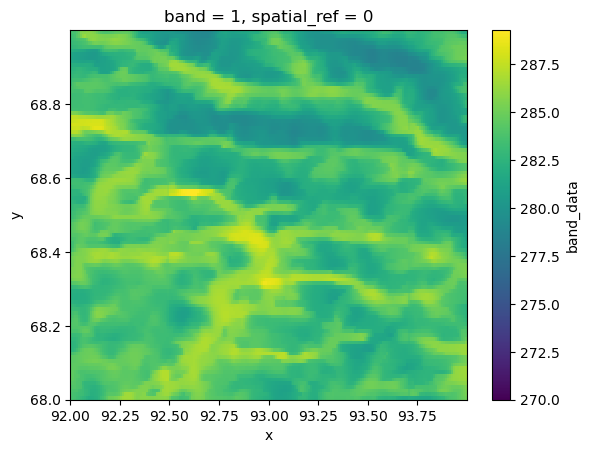

In [70]:
fiery_waterfall[5]['band_data'].sel(y=slice(68,69), x=slice(92,94)).plot(vmin=270)

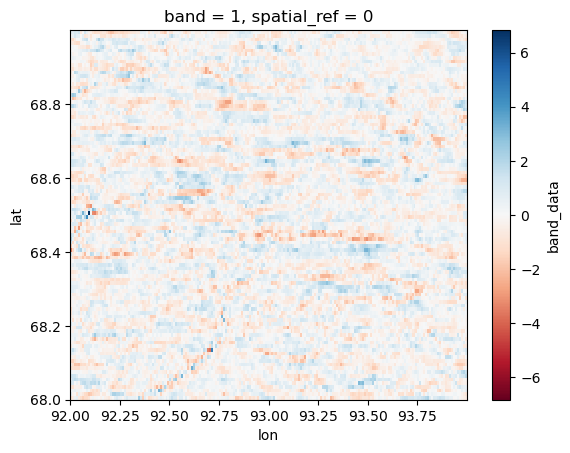

In [71]:
differences[5]['band_data'].sel(lat=slice(68,69), lon=slice(92,94)).plot(cmap="RdBu")

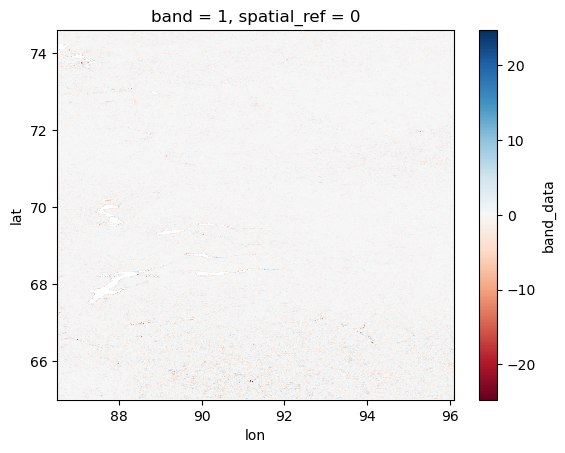

In [72]:
differences[5]['band_data'].plot(cmap="RdBu")

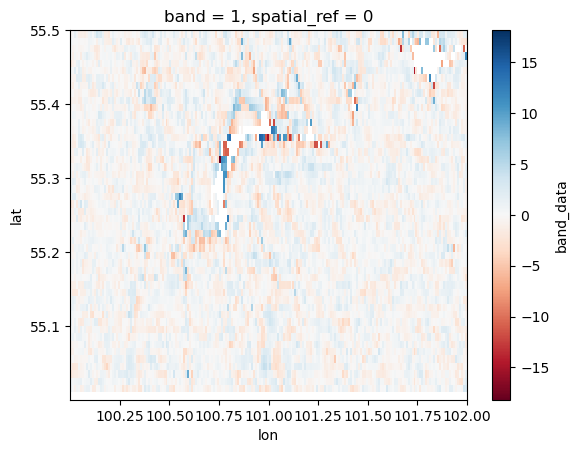

In [73]:
differences[6]['band_data'].sel(lat=slice(55,55.5), lon=slice(100,102)).plot(cmap="RdBu")

In [13]:
# Force same coordinate names if they differ
datasets = [ds.rename({"x": "lon", "y": "lat"}) if "x" in ds.dims else ds
            for ds in datasets]
evaluation_88 = [ds.rename({"x": "lon", "y": "lat"}) if "x" in ds.dims else ds
              for ds in evaluation_88]

# Reverse latitude if needed
datasets = [ds.sel(lat=slice(None, None, -1)) if ds.lat[0] > ds.lat[-1] else ds for ds in datasets]

differences_88 = []
for dsA, dsB in zip(datasets, evaluation_88):
    # Ensure consistent lat ordering
    if dsA.lat[0] > dsA.lat[-1]:
        dsA = dsA.sel(lat=slice(None, None, -1))
    if dsB.lat[0] > dsB.lat[-1]:
        dsB = dsB.sel(lat=slice(None, None, -1))

    # Interpolate dsB onto dsA's lat/lon grid
    dsB_interp = dsB.interp(lat=dsA.lat, lon=dsA.lon)
    
    differences_88.append(dsA - dsB_interp)

NameError: name 'evaluation_88' is not defined

In [ ]:
titles = [
    "Canada", "Alaska", "USA_Mexico", "Greenland",
    "Perm region (Russia)", "Krasnoyarsk region (Russia) ", "Oblast Irkutsk (Russia)", "Europe"
]

# Plot: 2 rows × 4 columns
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for ax, diff, title in zip(axes, differences_88, titles):
    var_name = list(diff.data_vars)[0]
    diff[var_name].plot(ax=ax, cmap="RdBu", robust=True, vmin=-4, vmax=4)
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [1]:
titles = [
    "Canada", "Alaska", "USA_Mexico", "Greenland",
    "Perm region (Russia)", "Krasnoyarsk region (Russia) ", "Oblast Irkutsk (Russia)", "Europe"
]

# Plot: 2 rows × 4 columns
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for ax, diff, title in zip(axes, differences, titles):
    var_name = list(diff.data_vars)[0]
    diff[var_name].plot(ax=ax, cmap="RdBu", robust=True, vmin=-4, vmax=4)
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

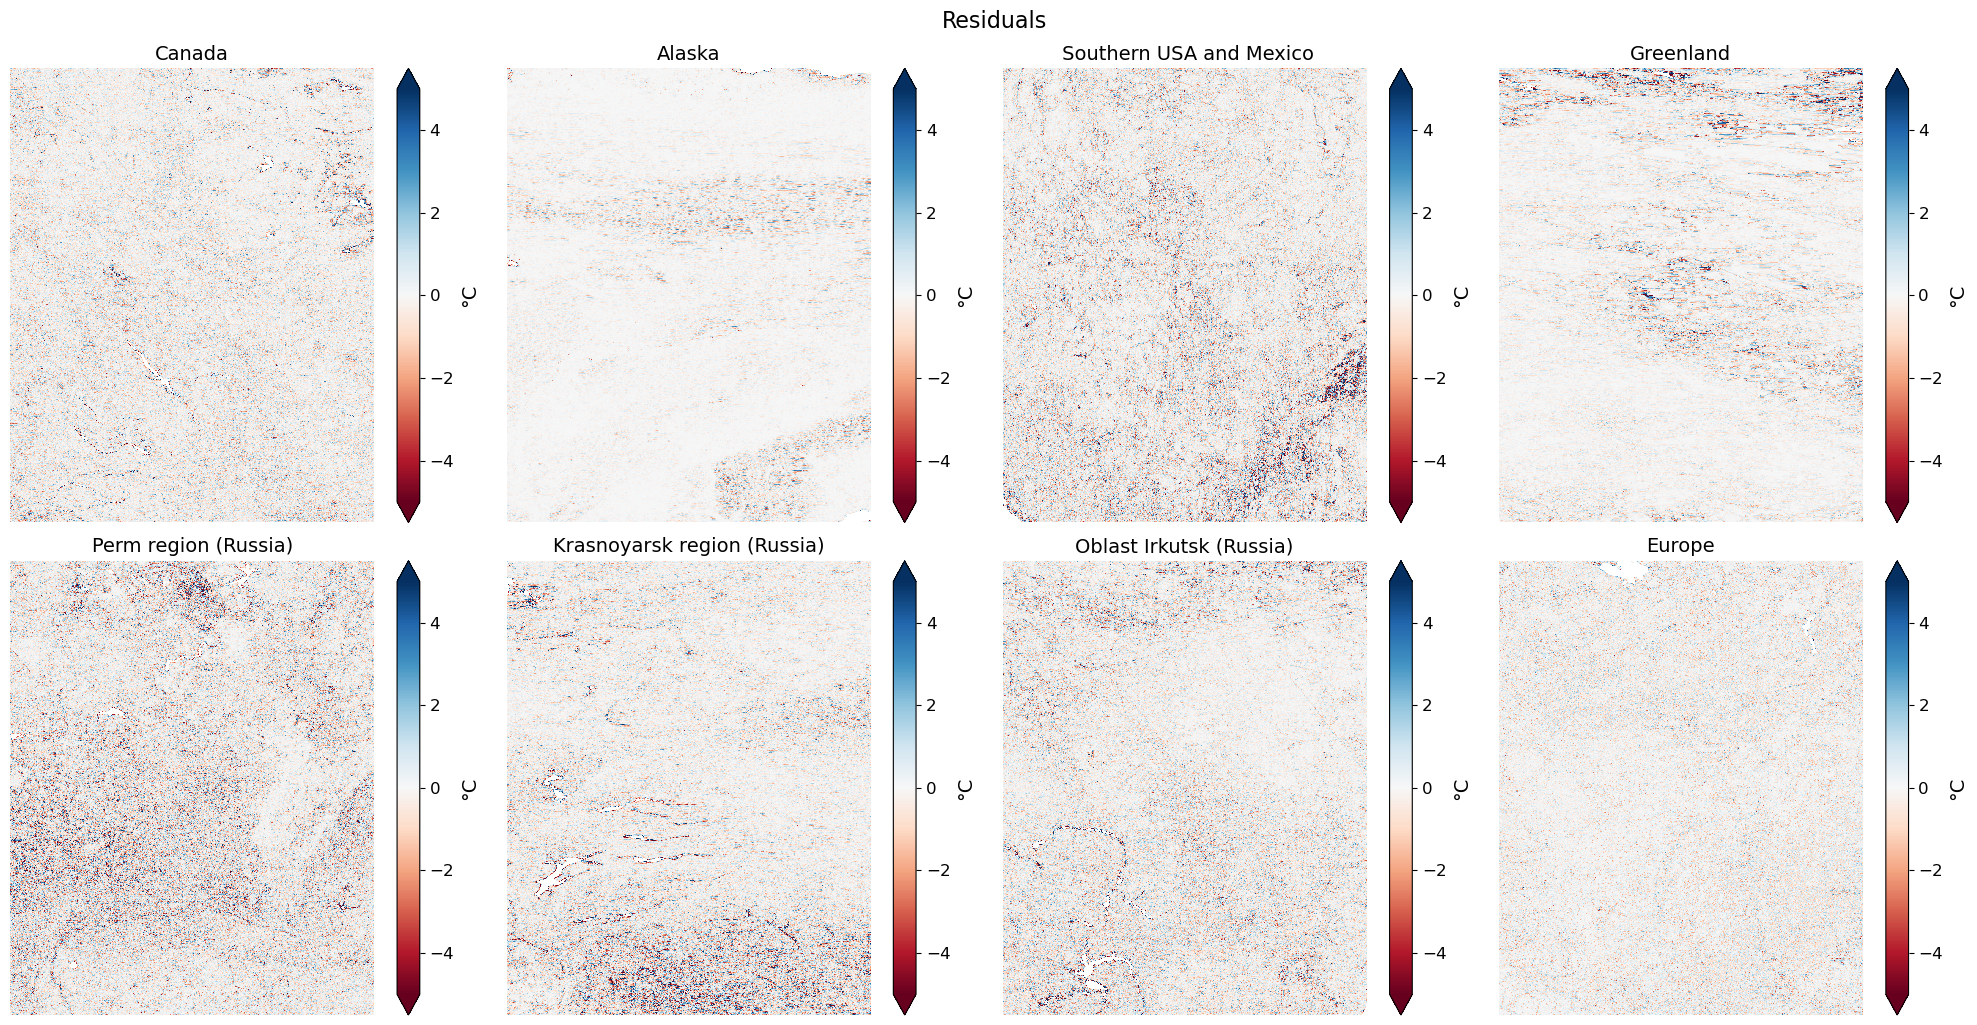

In [81]:
titles = [
    "Canada", "Alaska", " Southern USA and Mexico", "Greenland",
    "Perm region (Russia)", "Krasnoyarsk region (Russia)", "Oblast Irkutsk (Russia)", "Europe"
]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, (ax, diff, title) in enumerate(zip(axes, differences, titles)):
    var_name = list(diff.data_vars)[0]
    if i == 5:  # Scene 6 different scale
        cbar = diff[var_name].plot(ax=ax, cmap="RdBu", robust=True, vmin=-5, vmax=5)
    else:
        cbar = diff[var_name].plot(ax=ax, cmap="RdBu", robust=True, vmin=-5, vmax=5)
    ax.set_title(title, fontsize=14)
    ax.axis("off")

    # Set bigger font sizes for colorbar label and ticks
    if cbar.colorbar:
        cbar.colorbar.set_label("°C", fontsize=14)
        cbar.colorbar.ax.tick_params(labelsize=12)

plt.tight_layout()
plt.suptitle("Residuals", fontsize=16, y=1.02)  # Adjust y for suptitle above plots
plt.savefig("residuals_figure_2.pdf", dpi=300, bbox_inches='tight')
plt.show()

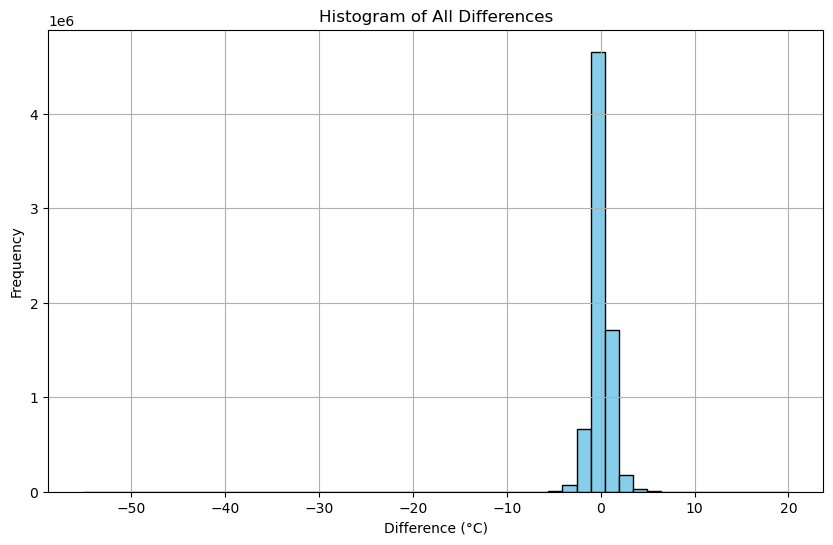

In [77]:
import numpy as np

# Concatenate all difference values into one array
all_diff_values = np.concatenate([
    diff[list(diff.data_vars)[0]].values.flatten() for diff in differences
])

# Remove NaNs before plotting
all_diff_values = all_diff_values[~np.isnan(all_diff_values)]

plt.figure(figsize=(10, 6))
plt.hist(all_diff_values, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of All Differences')
plt.xlabel('Difference (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

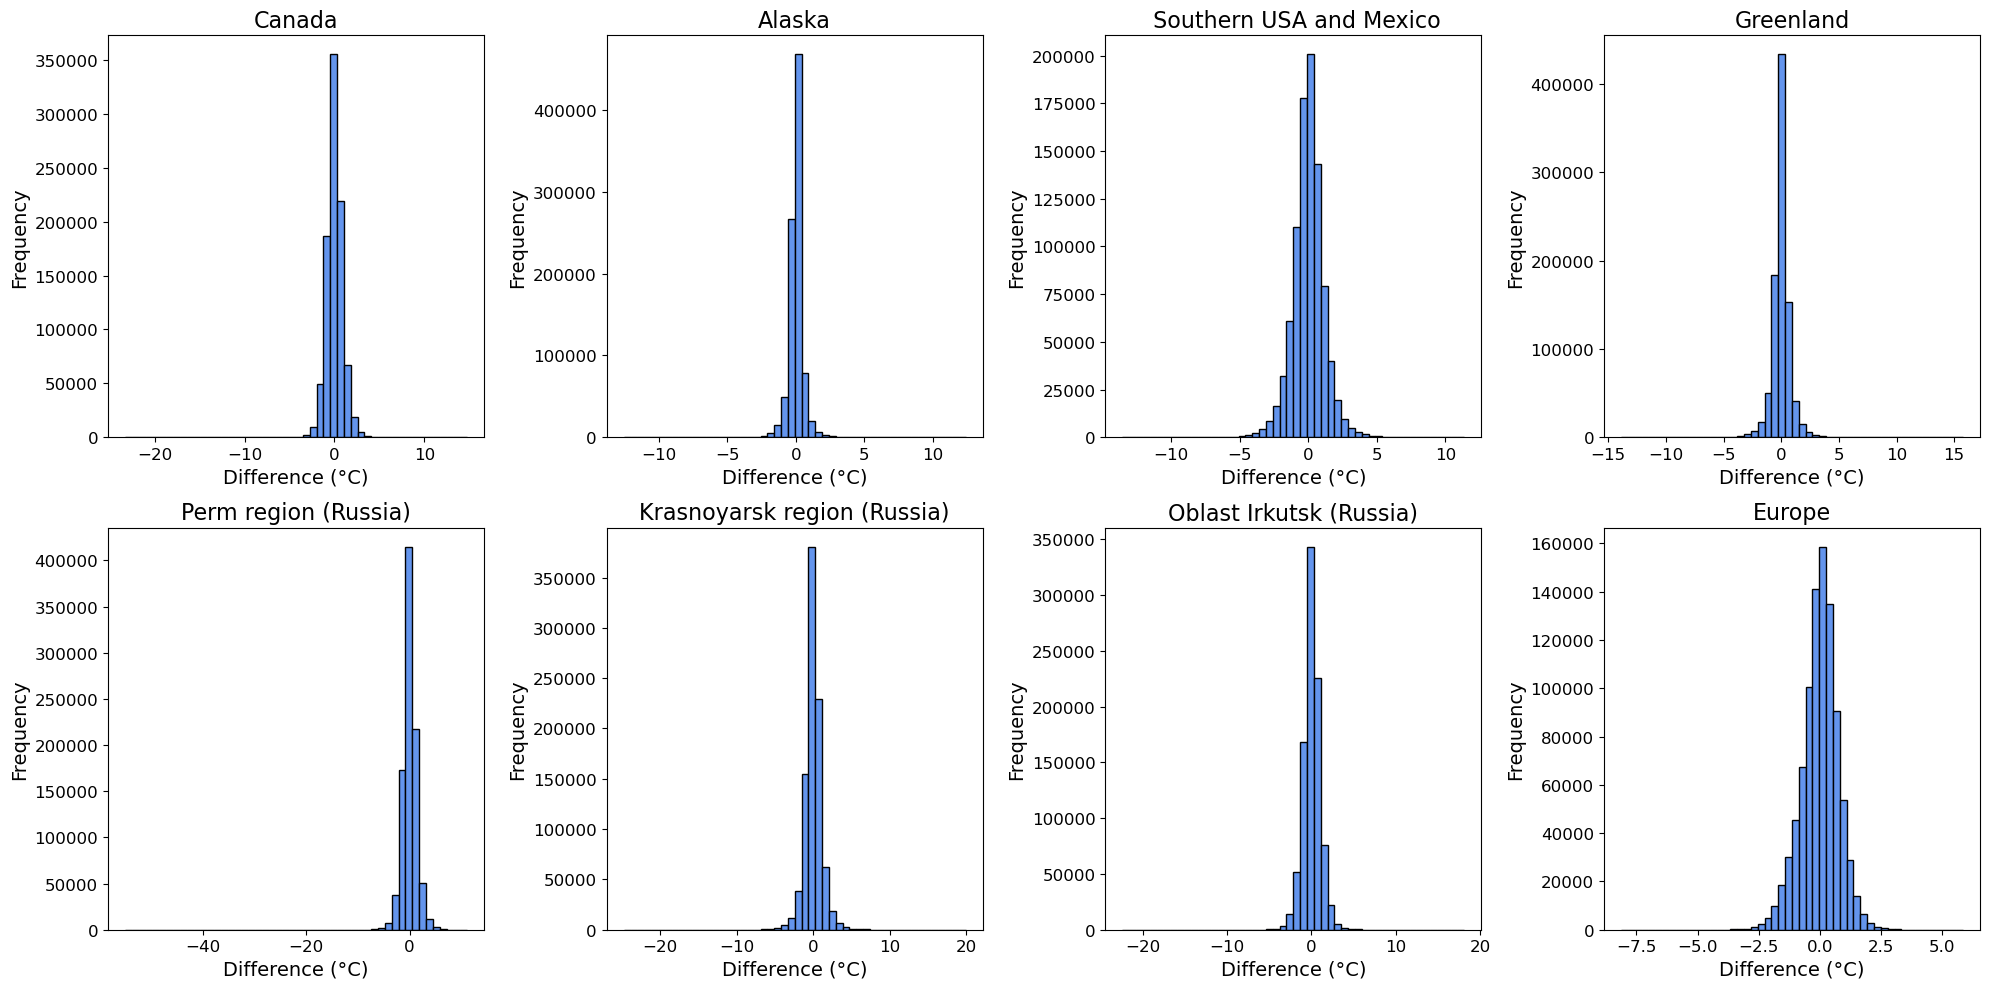

In [78]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for ax, diff, title in zip(axes, differences, titles):
    data = diff[list(diff.data_vars)[0]].values.flatten()
    data = data[~np.isnan(data)]
    ax.hist(data, bins=50, color='#6495ED', edgecolor='black')  # Cornflower blue
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Difference (°C)', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

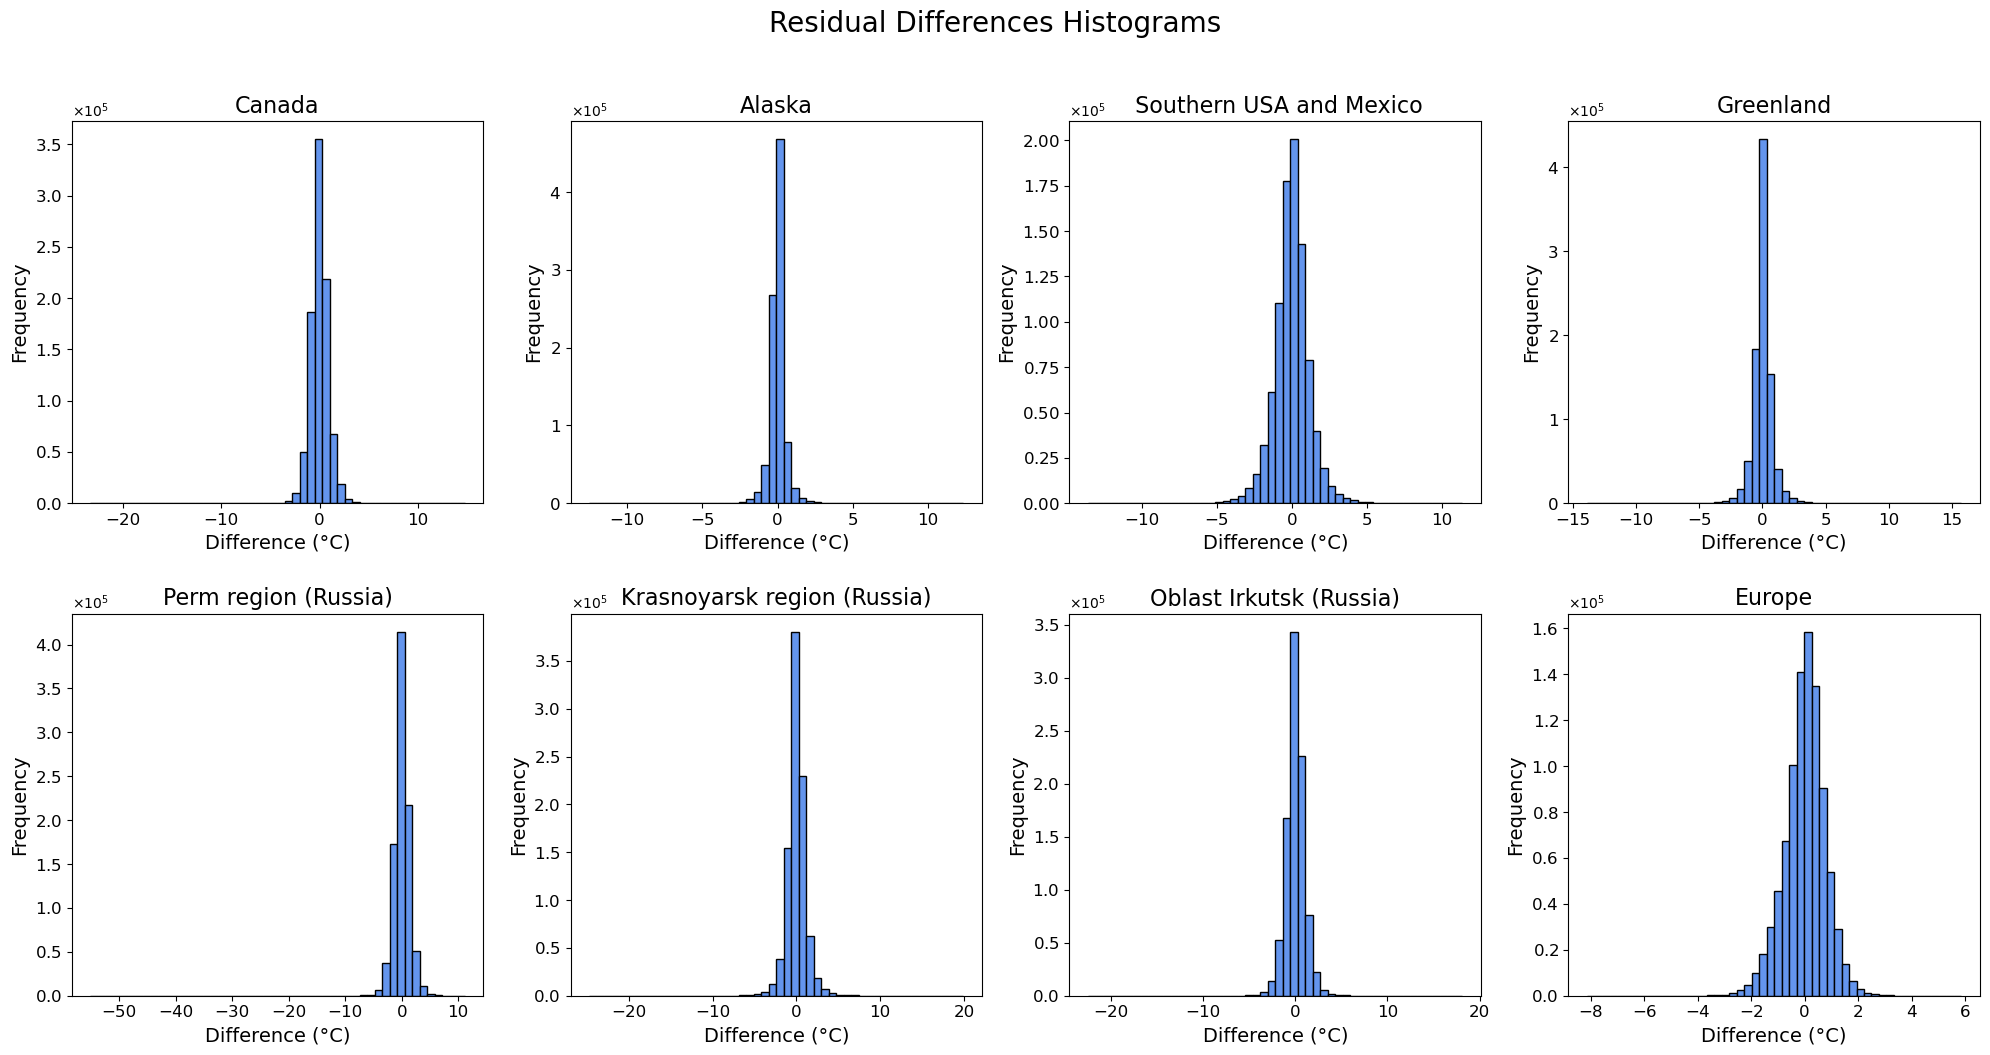

In [80]:
import matplotlib.ticker as mticker

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for ax, diff, title in zip(axes, differences, titles):
    data = diff[list(diff.data_vars)[0]].values.flatten()
    data = data[~np.isnan(data)]
    ax.hist(data, bins=50, color='#6495ED', edgecolor='black')  # Cornflower blue
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Difference (°C)', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    # Set y-axis to scientific notation
    formatter = mticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((-1,1))  # triggers scientific notation for all except very small/large numbers
    ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()
fig.suptitle('Residual Differences Histograms', fontsize=20, y=1.05)
plt.savefig("residuals_histograms_2.pdf", dpi=300, bbox_inches='tight')
plt.show()